In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import to_categorical

In [51]:
# Load dataset
bank_df = pd.read_csv('UniversalBank.csv')

In [52]:
# Visualize dataset
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<AxesSubplot:>

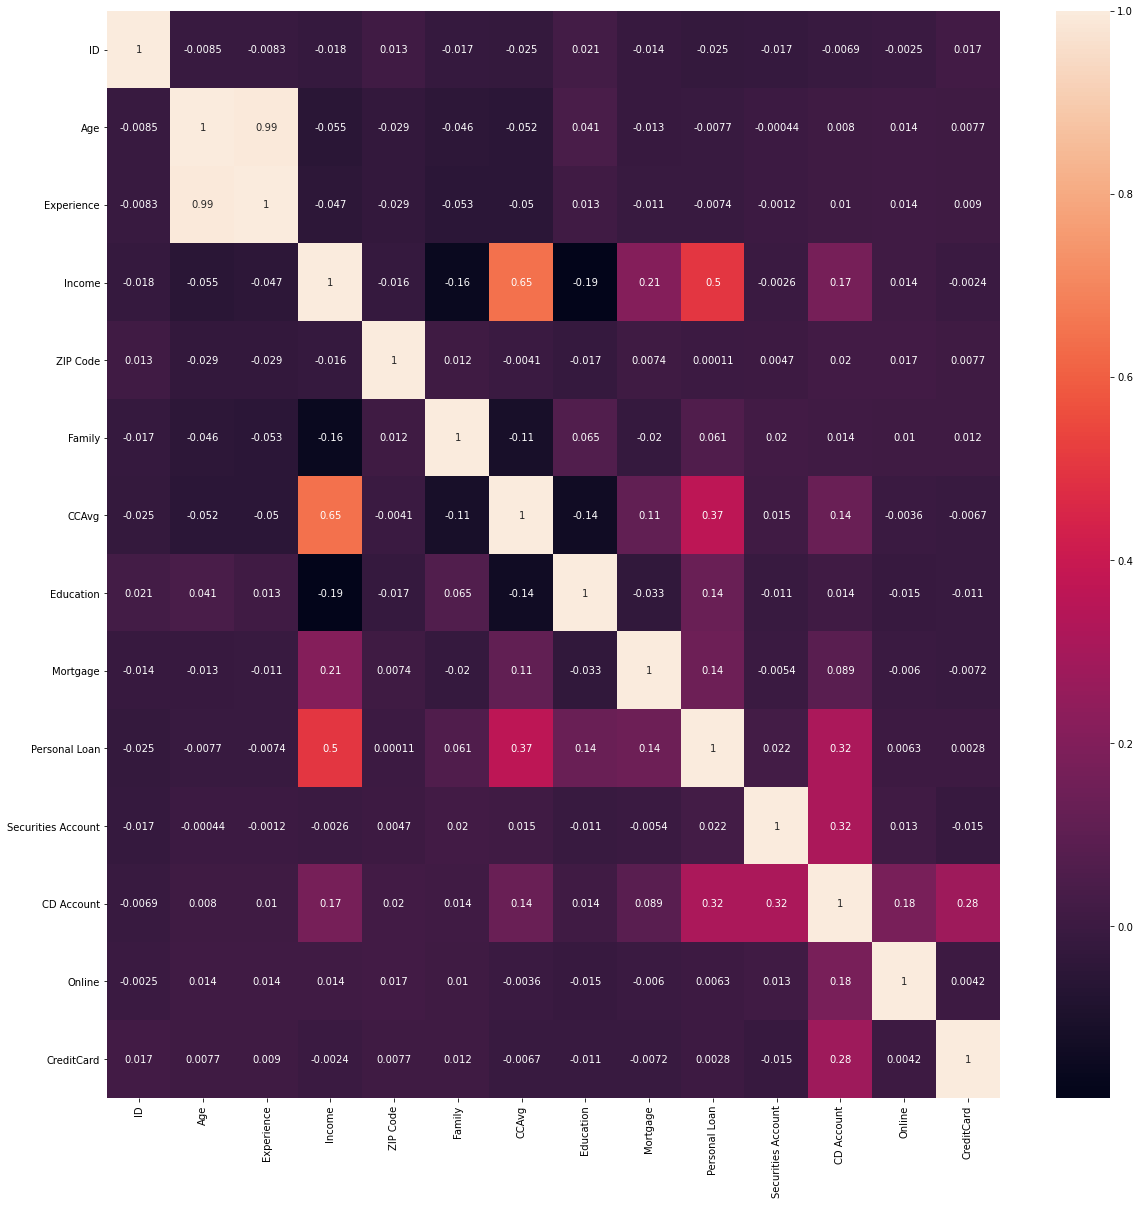

In [53]:
# Correlation plot
# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income
plt.figure(figsize = (20, 20))
cm = bank_df.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

In [54]:
# List all column names
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [55]:
# Specify model input features (all data except for the target variable) 
X = bank_df.drop(columns = ['Personal Loan'])
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [56]:
# Model output (target variable)
y = bank_df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [57]:
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [58]:
# scale the data before training the model
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [59]:
# spliting the data in to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [60]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

In [61]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.4))

# Add dense layer
ANN_model.add(Dense(250, activation = 'linear'))

# Add dropout layer
ANN_model.add(Dropout(0.5))

# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 250)               3500      
_________________________________________________________________
dropout_8 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               125500    
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 250)              

In [62]:
# Compile the model
ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [63]:
history = ANN_model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/20
113/113 [==============================] - 3s 18ms/step - loss: 0.1812 - accuracy: 0.9342 - val_loss: 0.0621 - val_accuracy: 0.9767
Epoch 2/20
113/113 [==============================] - 1s 10ms/step - loss: 0.1048 - accuracy: 0.9650 - val_loss: 0.0708 - val_accuracy: 0.9700
Epoch 3/20
113/113 [==============================] - 2s 13ms/step - loss: 0.0802 - accuracy: 0.9692 - val_loss: 0.0640 - val_accuracy: 0.9744
Epoch 4/20
113/113 [==============================] - 1s 12ms/step - loss: 0.0816 - accuracy: 0.9739 - val_loss: 0.0592 - val_accuracy: 0.9767
Epoch 5/20
113/113 [==============================] - 1s 12ms/step - loss: 0.0708 - accuracy: 0.9758 - val_loss: 0.0587 - val_accuracy: 0.9811
Epoch 6/20
113/113 [==============================] - 1s 13ms/step - loss: 0.0651 - accuracy: 0.9775 - val_loss: 0.0534 - val_accuracy: 0.9789
Epoch 7/20
113/113 [==============================] - 1s 13ms/step - loss: 0.0627 - accuracy: 0.9781 - val_loss: 0.0566 - val_accuracy: 0.9833

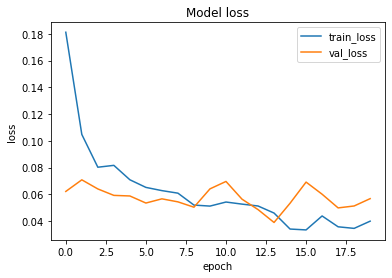

In [64]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [65]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [66]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

16/16 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9780
Accuracy : 0.9779999852180481


In [67]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

<AxesSubplot:>

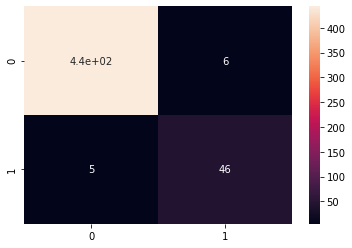

In [68]:
# Plot Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_matrix, annot = True)

In [69]:
# Print out the classification report
print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       449
           1       0.88      0.90      0.89        51

    accuracy                           0.98       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.98      0.98      0.98       500

